
 6️⃣ 22 – Generate Parentheses

 7️⃣ 78 – Subsets

 8️⃣ 704 – Binary Search

 9️⃣ Sum of Digits of a Number

 🔟 Tower of Hanoi Problem

#  6️⃣ 22 – Generate Parentheses


You are given n pairs of brackets ().You need to generate all possible valid combinations of these brackets.

Example:If n = 2, the valid combinations are: (()) , ()()

And the invalid ones are:  )(    -- because ')' came before '('  ,   (()   -- because one '(' was never closed

🧠 The Idea
- At each step, we have two choices:
- Add "(" — if we have used fewer than n opening brackets so far.
- Add ")" — if we have used fewer closing brackets than opening ones (to keep the string valid).
- We use recursion (a function calling itself) to explore all possible valid combinations step by step.

def generate(current: str, open_count: int, close_count: int):

This is the **helper function**.  
It adds brackets to the current string step by step.

- **current** = the string built so far  
- **open_count** = how many "(" have been added  
- **close_count** = how many ")" have been added  

---

### Step by Step:

1. Add `'('` → `"("`  
2. Add `'('` → `"(("`  
3. Can't add more `'('`, so add `')'` → `"(()"`  
4. Add another `')'` → `"(())"` ✅ done  
5. Go back and try another branch:  
   `"()"`, then `"()("`, then `"()()"` ✅ done


## 🧠 Full Dry Run for n = 2 

We start with:  
`current = ""`, `open_count = 0`, `close_count = 0`

---

### Step 1:
✅ Condition check: `open_count < n` → `0 < 2` → **True**

We can add `'('`.

Here we call
 
 generate(current + "(", open_count + 1, close_count)

- `current + "("` → `"" + "(" = "("`  
  (we are **adding one opening bracket** to the current string)
- `open_count + 1` → `0 + 1 = 1`  
  (we have now used one `'('`)

➡️ New call: generate("(", 1, 0)

---

### Step 2:
Now inside this new call:  
`current = "("`, `open_count = 1`, `close_count = 0`

✅ `open_count < n` → `1 < 2` → **True**  
We can add `'('` again.

generate(current + "(", open_count + 1, close_count) becomes generate("((", 2, 0)

- `current` was `"("`, now adding one more `'('` → `"(("`
- `open_count` becomes `2` (because we added another `'('`)

❌ We don’t add `')'` yet here because recursion first explores all `'('` possibilities.

---

### Step 3:
Now `current = "(("`, `open_count = 2`, `close_count = 0`

🚫 Can’t add `'('` anymore since `open_count == n` (2 == 2)

✅ But `close_count < open_count` → `0 < 2` → **True**  
So we can add `')'`.

generate(current + ")", open_count, close_count + 1)

- `current + ")"` → `"((" + ")" = "(()"`
- `close_count + 1` → `0 + 1 = 1`

➡️ New call: generate("(()", 2, 1)

---

### Step 4:
Now `current = "(()"`, `open_count = 2`, `close_count = 1`

🚫 Can't add `'('` → already used both opens  
✅ Can add `')'` (since `close_count < open_count` → `1 < 2`)

generate(current + ")", open_count, close_count + 1)

- `current + ")"` → `"(()" + ")" = "(())"`
- `close_count + 1` → `1 + 1 = 2`

➡️ New call: generate("(())", 2, 2)

---

### Step 5:
Now `current = "(())"`, length = `4` (`2 * n`)  
✅ Base case reached → Add to result

🧺 result = ["(())"]

Now we return to the previous step (backtrack).

---

### Backtrack to Step 2:
We go back to `current = "("`, `open_count = 1`, `close_count = 0`.

This time, instead of adding another `'('`, we try adding `')'`.

✅ Because `close_count < open_count` → `0 < 1`

generate(current + ")", open_count, close_count + 1)

- `current + ")"` → `"(" + ")" = "()"`  
- `close_count + 1` → `0 + 1 = 1`

➡️ New call: generate("()", 1, 1)

---

### Step 6:
Now `current = "()"`, `open_count = 1`, `close_count = 1`  
✅ Can add `'('` again since `open_count < n` → `1 < 2`

generate(current + "(", open_count + 1, close_count)

- `current + "("` → `"()" + "(" = "()("`
- `open_count + 1` → `1 + 1 = 2`

➡️ New call: generate("()(", 2, 1)

---

### Step 7:
Now `current = "()("`, `open_count = 2`, `close_count = 1`  
🚫 Can't add `'('` (already 2)  
✅ Can add `')'` (`1 < 2`)

generate(current + ")", open_count, close_count + 1)

- `current + ")"` → `"()(" + ")" = "()()"`
- `close_count + 1` → `1 + 1 = 2`

➡️ New call: generate("()()", 2, 2)

---

### Step 8:
Now `current = "()()"`, length = `4` (`2 * n`)  
✅ Base case reached → Add to result

🧺 result = ["(())", "()()"]

---

## ✅ Final Output

When you call:

print(Solution().generateParenthesis(2))

You’ll get:
['(())', '()()']

---

### 🧠 In Short:

| Expression | Meaning |
|-------------|----------|
| `current + "("` | Adds one more `'('` to the string |
| `open_count + 1` | Because we just used one extra `'('` |
| `current + ")"` | Adds one more `')'` to the string |
| `close_count + 1` | Because we just used one extra `')'` |


In [ ]:
from typing import List
class Solution:
    def generateParenthesis(self, n:int)->List[str]:
        result = []
        def generate(current:str, open_count:int, close_count:int): #generate("(",1,0)
            if len(current)== 2*n: #2*2=4
                result.append(current)
                return
            
            # Add '(' if possible
            if open_count < n:  #0<2, #1<2 
                generate(current+"(", open_count+1, close_count) # current="" + "(" = "(" ,open_count = 0+1 ,close_count =0,
                #current =current+"("=  "("+"("="((" , open_count=1+1 =2, close_count=0

            # Add ')' if possible 
            if close_count < open_count: #0<2=True # 1<2= True #0<1
                generate(current+")",open_count,close_count+1) # current =`"((" + ")" = "(()"` #`close_count + 1` → `0 + 1 = 1` open_count=2
                # current = "(()"+")" =(()) #close_count =2, opent_count =2
             

        generate("",0,0) #generate("(",1,0) ,#generate("((",2,0), #generate("(()",2,1) #generate("(())",2,2) #generate("()",1,1) #generate("()",2,1)
        return result    
print(Solution().generateParenthesis(2))


['(())', '()()']


## 🧩 The Two Functions

### 1️⃣ Outer Function: `generateParenthesis(self, n)`

This is the **main function** you call from outside.  
It’s like the **“setup” function** that:

- Receives the input `n`  
- Creates an empty list `result = []`  
- Defines the inner helper function  
- Starts the process by calling the helper once → `generate("", 0, 0)`  
- Finally returns all valid combinations → `return result`

💡 **In short:**  
It sets up everything and collects results.


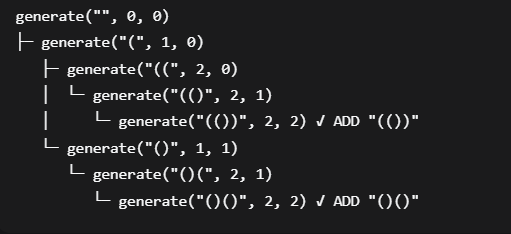

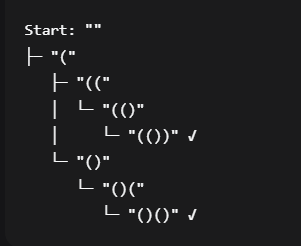

In [3]:
from typing import List

class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        result = []

        def generate(current: str, open_count: int, close_count: int):
            # Base case: when current string is complete
            if len(current) == 2 * n:
                result.append(current)
                return

            # Add '(' if possible
            if open_count < n:
                generate(current + "(", open_count + 1, close_count)

            # Add ')' if possible
            if close_count < open_count:
                generate(current + ")", open_count, close_count + 1)

        # Start recursion
        generate("", 0, 0)
        return result
print(Solution().generateParenthesis(2))


['(())', '()()']


# ## 🔢 Problem — 78. Subsets

Given an integer array `nums`, return **all possible subsets (the power set)**.

Each element may be **either included or excluded** in a subset.  
The solution set must not contain duplicate subsets.

---

### 🧠 Idea (Recursion / Backtracking)

At each step, we have **two choices** for every element:
1. **Include** the element in the current subset
2. **Exclude** the element and move on

We use recursion to explore both paths for every element.

---

subsets are all possible combinations we can make from a set of items

For items [A, B]
- All subsets: [], [A], [B], [A,B]

#### n items = 2ⁿ subsets

- 1 item → 2 subsets
- 2 items → 4 subsets
- 3 items → 8 subsets

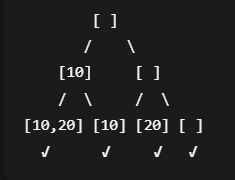

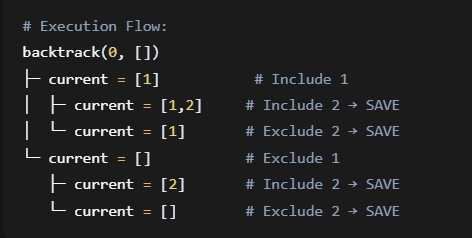

| Step | Call / Action | index | current | Condition | Result / Action Taken | Result List |
|------|----------------|--------|----------|------------|------------------------|--------------|
| 🎯 INITIAL | backtrack(0, []) | 0 | [] | - | Start recursion | [] |
| 1 | At backtrack(0, []) → INCLUDE nums[0] = 10 | 0 | [10] | 0 == 2 ❌ | Call backtrack(1, [10]) | [] |
| 2 | At backtrack(1, [10]) → INCLUDE nums[1] = 20 | 1 | [10, 20] | 1 == 2 ❌ | Call backtrack(2, [10, 20]) | [] |
| 3 | At backtrack(2, [10, 20]) | 2 | [10, 20] | 2 == 2 ✅ | SAVE [10, 20] | [[10, 20]] |
| 4 | Return → backtrack(1, [10]) → EXCLUDE nums[1] = 20 | 1 | [10] | - | Call backtrack(2, [10]) | [[10, 20]] |
| 5 | At backtrack(2, [10]) | 2 | [10] | 2 == 2 ✅ | SAVE [10] | [[10, 20], [10]] |
| 6 | Return → backtrack(0, []) → EXCLUDE nums[0] = 10 | 0 | [] | - | Call backtrack(1, []) | [[10, 20], [10]] |
| 7 | At backtrack(1, []) → INCLUDE nums[1] = 20 | 1 | [20] | 1 == 2 ❌ | Call backtrack(2, [20]) | [[10, 20], [10]] |
| 8 | At backtrack(2, [20]) | 2 | [20] | 2 == 2 ✅ | SAVE [20] | [[10, 20], [10], [20]] |
| 9 | Return → backtrack(1, []) → EXCLUDE nums[1] = 20 | 1 | [] | - | Call backtrack(2, []) | [[10, 20], [10], [20]] |
| 10 | At backtrack(2, []) | 2 | [] | 2 == 2 ✅ | SAVE [] | [[10, 20], [10], [20], []] |
| ✅ FINAL | - | - | - | - | COMPLETE | **[[10, 20], [10], [20], []]** |


num=[10,20] ,  len(nums)=2

In [ ]:
from typing import List
class Solution:
    def subsets(self, nums:List[int])->List[List[int]]:
        result = []
        def backtrack(index:int, current:List[int]):
            if index == len(nums): 
                result.append(current[:]) 
                return
            
            # include
            current.append(nums[index])
            backtrack(index+1, current) 

            #exclude
            current.pop() 
            backtrack(index+1, current) 
            
        backtrack(0, [])  
        return result
print(Solution().subsets([10,20]))              



[[10, 20], [10], [20], []]


# 8️⃣ 704 – Binary Search


# 🎯 Dry Run Example

## Input:
nums = [-1, 0, 3, 5, 9, 12]  
target = 9  

---
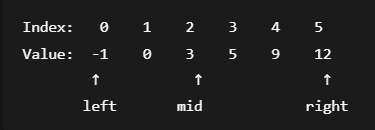

### Step-by-Step Execution

| Step | Call | mid Calculation | nums[mid] | Comparison | Action / Next Call |
|------|------|-----------------|------------|-------------|--------------------|
| 1 | binary_search(0, 5) | mid = (0 + 5)//2 = 2 | nums[2] = 3 | 3 < 9 | → Search right → binary_search(2+1, 5) |
| 2 | binary_search(3, 5) | mid = (3 + 5)//2 = 4 | nums[4] = 9 | 9 == 9 ✅ | **Return 4** |

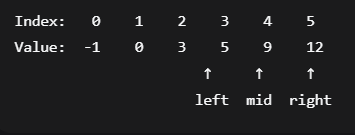

✅ **Output:** 4  

---

### 🎯 Another Example (Target Not Found)

## Input:
nums = [-1, 0, 3, 5, 9, 12]  
target = 2  

---

### Step-by-Step Execution

| Step | Call | mid Calculation | nums[mid] | Comparison | Action / Next Call |
|------|------|-----------------|------------|-------------|--------------------|
| 1 | binary_search(0, 5) | mid = (0 + 5)//2 = 2 | nums[2] = 3 | 3 > 2 | → Search left → binary_search(0, 1) |
| 2 | binary_search(0, 1) | mid = (0 + 1)//2 = 0 | nums[0] = -1 | -1 < 2 | → Search right → binary_search(1, 1) |
| 3 | binary_search(1, 1) | mid = (1 + 1)//2 = 1 | nums[1] = 0 | 0 < 2 | → Search right → binary_search(2, 1) |
| 4 | binary_search(2, 1) | - | - | left > right | **Return -1** |

✅ **Output:** -1


In [19]:
from typing import List

class Solution:
    def search(self, nums: List[int], target: int) -> int:
        def binary_search(left, right):
            # Base case
            if left > right:
                return -1

            mid = (left + right) // 2

            # Found target
            if nums[mid] == target:
                return mid
            elif nums[mid] > target:
                return binary_search(left, mid - 1)
            else:
                return binary_search(mid + 1, right)

        return binary_search(0, len(nums) - 1)#Search in complete array: indexes 0 to 5
print(Solution().search([-1, 0, 3, 5, 9, 12] ,9))              
    


4


#  9️⃣ Sum of Digits of a Number


num = 29
| Step | Call            | Condition (`num < 10`) | `num > 0` | `s += num % 10` | `num //= 10` | Return / Recursive Call    |
| ---- | --------------- | ---------------------- | --------- | --------------- | ------------ | -------------------------- |
| 1    | `addDigits(29)` | 29 < 10 ❌              | 29 > 0 ✅  | s = 0 + 9 = 9   | num = 2      |                            |
| 2    |                 | 2 > 0 ✅                |           | s = 9 + 2 = 11  | num = 0      |                            |
| 3    |                 | 0 > 0 ❌                |           |                 |              | `addDigits(11)`            |
| 4    | `addDigits(11)` | 11 < 10 ❌              | 11 > 0 ✅  | s = 0 + 1 = 1   | num = 1      |                            |
| 5    |                 | 1 > 0 ✅                |           | s = 1 + 1 = 2   | num = 0      |                            |
| 6    |                 | 0 > 0 ❌                |           |                 |              | `addDigits(2)`             |
| 7    | `addDigits(2)`  | 2 < 10 ✅               | —         | —               | —            | Return **2** (Base Case ✅) |



In [ ]:
class Solution:
    def addDigits(self, num: int) -> int:
        if num < 10:
            return num  # base case

        s = 0
        while num > 0:
            s += num % 10 
            num //= 10 
        
        return self.addDigits(s)  # recursive call,8,11

# Test with integers, not lists
print(Solution().addDigits(38))    # Output: 2
print(Solution().addDigits(1234))  # Output: 1
print(Solution().addDigits(0))     # Output: 0
print(Solution().addDigits(9))     # Output: 9

2
1
0
9


### 🎪 Tower of Hanoi Story (n = 3)
🏗 Setup

You have 3 disks:

🟡 (small) 🟠 (medium) 🔴 (large)

All start on Rod A.

Goal: Move all disks from A → C using B as a helper.

### 🧩 The “Magic 3-Step” Recursive Formula

For any number of disks n:
- 1️⃣ Move (n-1) disks from Source → Helper
- 2️⃣ Move largest disk from Source → Destination
- 3️⃣ Move (n-1) disks from Helper → Destination

### Let’s Trace for n = 3

| Step  | Description                          | Rod A  | Rod B | Rod C  |
| ----- | ------------------------------------ | ------ | ----- | ------ |
| Start | Initial setup                        | 🔴🟠🟡 |       |        |
| 1     | Move 2 disks A → B (using C)         | 🔴     | 🟠🟡  |        |
| 2     | Move largest disk A → C              |        | 🟠🟡  | 🔴     |
| 3     | Move 2 disks B → C (using A)         |        |       | 🔴🟠🟡 |
| ✅     | **All disks moved successfully!** 🎉 |        |       | 🔴🟠🟡 |


In [31]:
def tower_of_hanoi(n, source, helper, destination):
    # BASE CASE: Only 1 disk → move directly
    if n == 1:
        print(f"Move disk 1 from {source} → {destination}")
        return

    # STEP 1: Move top (n-1) disks to helper
    tower_of_hanoi(n - 1, source, destination, helper)

    # STEP 2: Move largest disk to destination
    print(f"Move disk {n} from {source} → {destination}")

    # STEP 3: Move (n-1) disks from helper to destination
    tower_of_hanoi(n - 1, helper, source, destination)


- source = where disks currently are
- destination = where you want them
- helper = temporary storage

### ✅ Final Rule to Remember

Always:

- Move smaller ones aside
- Move the largest to its destination
- Move smaller ones back on top